**Name: Arwaz Khan**

**Roll No.: 242210005**

**Date: 22/03/2025**

**Time: 5:30 PM**

# **Regression**

**1.Implementing Linear Regression** (https://www.kdnuggets.com/linear-regression-from-scratch-with-numpy):

a. Train a Linear Regression model from scratch to predict house prices using the dataset (https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset).

b. Target variable (y): MEDV (Median Value of Owner-Occupied Homes in $1000s).

c. Feature (X): RM (Average Number of Rooms per Dwelling).

d. Use Mean Squared Error (MSE) as the loss function.

e. Implement Gradient Descent to optimise the weights.

f. Plot the regression line over the scatter plot of data points.

**2.Implementing Logistic Regression** (https://www.geeksforgeeks.org/implementation-of-logistic-regression-from-scratch-using-python/):

a. Train a Logistic Regression model from scratch to classify tumours as benign or malignant on the dataset [https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset].

b. Target variable (y): Diagnosis (0 = Benign, 1 = Malignant).

c. Feature (X): mean radius

d. Use the Sigmoid Activation Function

e. Optimise weights using Binary Cross-Entropy Loss and Gradient Descent.

f. Plot the decision boundary to visualise classification.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load datasets
housingDS = pd.read_csv("BostonHousing.csv")
cancerDS = pd.read_csv("breast-cancer.csv")

In [3]:
print("Housing Dataset: ")
housingDS.head(5)

Housing Dataset: 


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print("Breast Cancer Dataset: ")
cancerDS.head(5)

Breast Cancer Dataset: 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**1.Implementing Linear Regression**

In [5]:
# b. Target variable (y): MEDV (Median Value of Owner-Occupied Homes in $1000s).
# c. Feature (X): RM (Average Number of Rooms per Dwelling).
X = housingDS['rm'].values
y = housingDS['medv'].values

X = (X - np.mean(X)) / np.std(X)
X = np.c_[np.ones(X.shape[0]), X]
theta = np.zeros(X.shape[1])

In [6]:
# d. Use Mean Squared Error (MSE) as the loss function.
def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return loss


In [7]:
# e. Implement Gradient Descent to optimise the weights.
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    loss_history = []

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        loss = compute_loss(X, y, theta)#
        loss_history.append(loss)

    return theta, loss_history


In [8]:
learning_rate = 0.01
num_iterations = 1000

In [9]:
# Train the model
theta, loss_history = gradient_descent(X, y, theta, learning_rate, num_iterations)

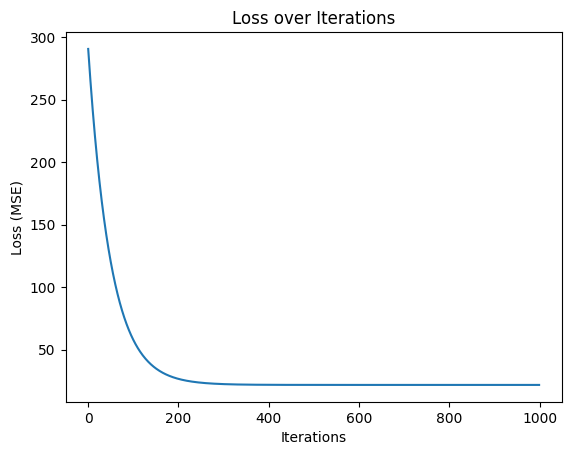

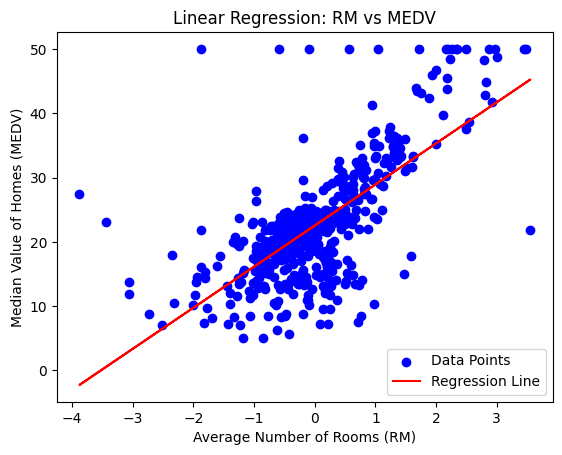

Final weights (theta): [22.53183355  6.3886994 ]


In [10]:
# f. Plot the regression line over the scatter plot of data points.

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss over Iterations')
plt.show()

plt.scatter(X[:, 1], y, color='blue', label='Data Points')
plt.plot(X[:, 1], X.dot(theta), color='red', label='Regression Line')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Linear Regression: RM vs MEDV')
plt.legend()
plt.show()

# final weights
print("Final weights (theta):", theta)

**2.Implementing Logistic Regression**

In [11]:
# b. Target variable (y): Diagnosis (0 = Benign, 1 = Malignant).
# c. Feature (X): mean radius
X = cancerDS['radius_mean'].values
y = cancerDS['diagnosis'].values

y = cancerDS['diagnosis'].apply(lambda x:1 if x== 'M' else 0).values


X = (X - np.mean(X)) / np.std(X)
X = np.c_[np.ones(X.shape[0]), X]
theta = np.zeros(X.shape[1])

In [12]:
# d. Use the Sigmoid Activation Function
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
# e. Optimise weights using Binary Cross-Entropy Loss and Gradient Descent.
# Binary Cross-Entropy Loss function
def compute_loss(X, y, theta):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    loss = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    loss_history = []

    for i in range(num_iterations):
        predictions = sigmoid(X.dot(theta))
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)

    return theta, loss_history

In [14]:
learning_rate = 0.01
num_iterations = 1000

In [15]:
# Train the model
theta, loss_history = gradient_descent(X, y, theta, learning_rate, num_iterations)

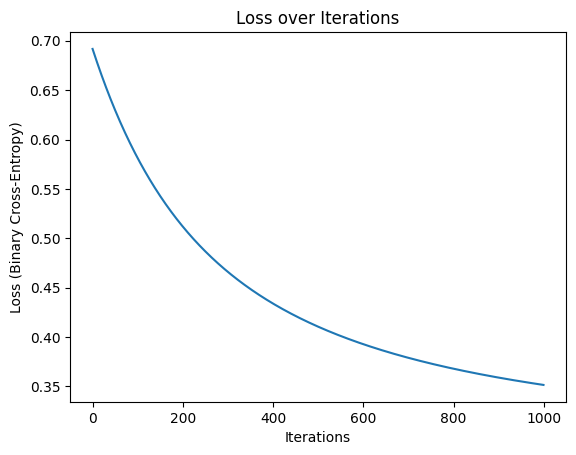

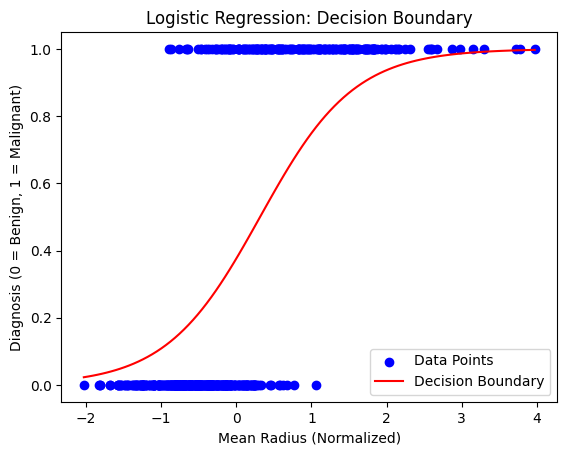

Final weights (theta): [-0.50581227  1.60093126]


In [16]:
# f. Plot the decision boundary to visualise classification.
# Plot the loss over iterations
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.title('Loss over Iterations')
plt.show()

plt.scatter(X[:, 1], y, color='blue', label='Data Points')
x_values = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
y_values = sigmoid(theta[0] + theta[1] * x_values)
plt.plot(x_values, y_values, color='red', label='Decision Boundary')
plt.xlabel('Mean Radius (Normalized)')
plt.ylabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.title('Logistic Regression: Decision Boundary')
plt.legend()
plt.show()

# final weights
print("Final weights (theta):", theta)